In [48]:
#Objetivos
# patent number,
# date of patent, 
# patent title, 
# inventor name
# filed data.

## Importação de Bibliotecas

In [1]:
# Biblioteca OCR
from pytesseract import pytesseract
import matplotlib.pyplot as plt
import cv2
import re

from glob import glob

## Classes e Metodos

In [2]:
arquivos = sorted(glob(r'Imagem_patentes/*png'))
arquivos

['Imagem_patentes/document-000-104213.in.000.png',
 'Imagem_patentes/document-003-104691.in.000.png',
 'Imagem_patentes/document-004-104802.in.000.png',
 'Imagem_patentes/document-005-104980.in.000.png',
 'Imagem_patentes/document-006-105103.in.000.png',
 'Imagem_patentes/document-007-105262.in.000.png',
 'Imagem_patentes/document-008-105364.in.000.png',
 'Imagem_patentes/document-013-106007.in.000.png',
 'Imagem_patentes/document-015-106205.in.000.png',
 'Imagem_patentes/document-016-106346.in.000.png']

In [49]:
# A classe não está retornando a variavel "inventor_name" corretamente, necessita de correção

class Extract_Information():
    
   # Inicializando a Classe recebendo o caminho da pasta dos arquivos
   def __init__(self, caminho_imagem):
      self.caminho_imagem = caminho_imagem

   # Execução do programa retornando numero da patente, data da patente, titulo da patente, nome do inventor e data do arquivo
   def main(self):
      self.arquivos = self.ler_arquivos()


      for arquivo in self.arquivos:

         Imagem_patente(caminho_image= arquivo).showImage()
         
         imagem_limpa = Imagem_patente(caminho_image= arquivo).Image()
         self.patent_number, self.patent_date, self.patent_title, self.inventor_name, self.filed_data = OCR_Image(imagem_limpa).main()

         print(self.patent_number, self.patent_date, self.patent_title, self.inventor_name, self.filed_data)

         
   def ler_arquivos(self):
      arquivos = sorted(glob(f'{self.caminho_imagem}/*png'))

      return arquivos
   
   
   

In [59]:
class Imagem_patente():

    # Inicialização do Metodo
    def __init__(self, caminho_image):
        self.img = cv2.imread(caminho_image)
        
    # Plotar a Imagem
    def showImage(self):
        img_show = self.cutImage()
        img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show)
        return plt.show()
    
    # Capturar as cores da Imagem
    def getColor(self, x, y):
        return self.img.item(y, x, 0), self.img.item(y, x, 1), self.img.item(y, x, 2)

    # Modificar as cores da Imagem
    def setColor(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_RGB2BGR)
        altura, largura, canais_de_cor = self.img.shape

        for y in range(0, altura):
            for x in range(0, largura):

                azul, verde, vermelho = getColor(self.img, x, y)
                #obj_img = setColor(obj_img, x, y, 0, 0, 0)
        self.showImage() 
    
    # Recortar apenas a parte utilizavel do arquivo
    def cutImage(self):
        altura, largura, canais_de_cor = self.img.shape

        altura_nova = int((altura/ 2) )
        largura_nova = int(largura)

        cut_img = self.img[0:altura_nova, 0: largura_nova]

        return cut_img

    # Retornar o arquivo da imagem em OpenCV recortado
    def Image(self):
        img_cut = self.cutImage()
        return img_cut

In [58]:
class OCR_Image():

    # Iniciando a Classe com a Imagem
    def __init__(self, img, lang= "eng"):
        self.strings = pytesseract.image_to_string(image= img, lang= lang)

    
    #Execução da classe retorando os valores procurados
    def main(self):
        texto_limpo = self.Filter()

        patent_number = self.encontrar_elemento("(?<=Patent Number:).+", texto_limpo)
        patent_date = self.encontrar_elemento("(?<=Date of Patent:).+", texto_limpo)
        patent_title = self.encontrar_elemento("(?<=Inventor:).+(?=,)", texto_limpo)
        inventor_name = self.encontrar_elemento("(?<=Inventor:).+(?=,)", texto_limpo) # O REGEX dessa variavel está incorreto
        filed_data = self.encontrar_elemento("(?<=Filed:).+", texto_limpo)
    
        return patent_number, patent_date, patent_title, inventor_name, filed_data




    # Filtrando as linhas em Branco e dividindo em lista
    def Filter(self):
        self.strings = self.strings.lower()
        self.strings = self.strings.split("\n")
        texto_limpo = []

        for linha in self.strings:
         if not linha.isspace() and len(linha) > 0:
            texto_limpo.append(linha)
        
        texto_limpo = texto_limpo
        return texto_limpo

    # Encontrando a palatra_chave por REGEX e retornando o resultado
    def encontrar_elemento(self, REGEX, texto_limpo):
        lista = texto_limpo
        for s in lista:
            match = re.findall(REGEX, s)
            if match != []:
                break
        
        return match

    # Metodo que apenas retona a imagem convertida em STRING
    def ImageString(self):
        return self.strings


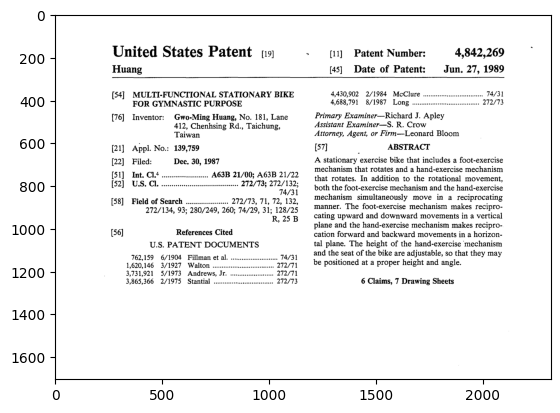

[' 4,842,269'] [' Jun. 27, 1989'] [' Gwo-Ming Huang, No. 181'] [' Gwo-Ming Huang, No. 181'] [' Dee. 30, 1987']


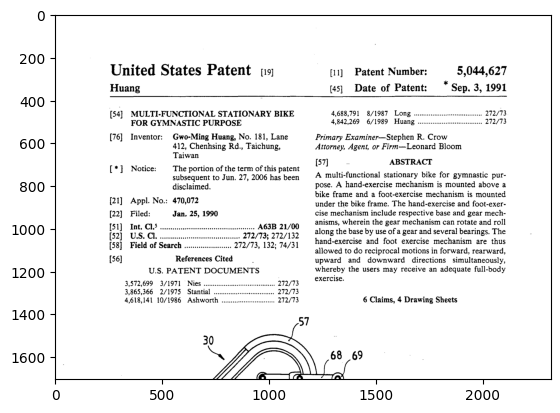

[] [] [' Gwo-Ming Huang, No. 181'] [' Gwo-Ming Huang, No. 181'] [' Jan. 25, 1990']


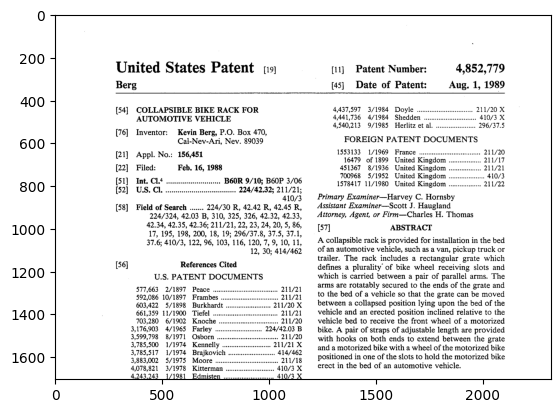

[' 4,852,779'] [' Aug. 1, 1989'] [' Kevin Berg, P.O. Box 470'] [' Kevin Berg, P.O. Box 470'] [' Feb. 16, 1988']


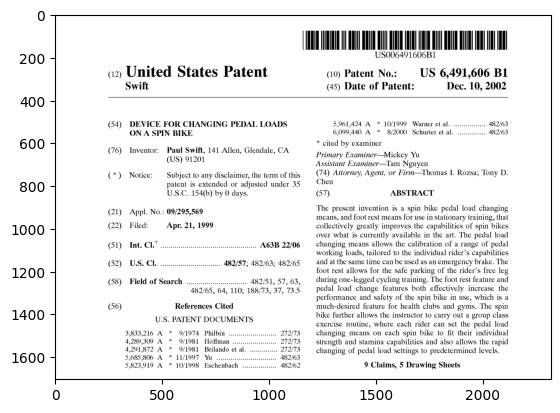

[] [] [' Paul Swift, 141 Allen, Glendale'] [' Paul Swift, 141 Allen, Glendale'] [' Apr. 21, 1999']


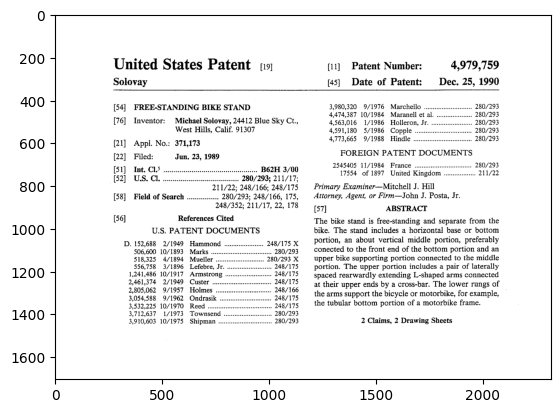

[' 4,979,759'] [' Dec. 25, 1990'] [' Michael Solovay, 24412 Blue Sky Ct.'] [' Michael Solovay, 24412 Blue Sky Ct.'] [' Jun. 23, 1989']


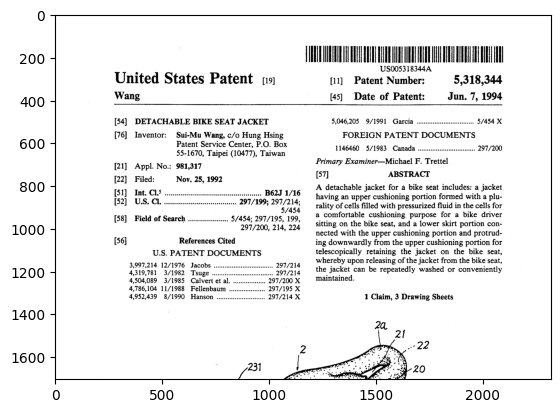

[' 5,318,344'] [' Jun. 7, 1994'] [' Sui-Mu Wang'] [' Sui-Mu Wang'] [' Nov. 25, 1992']


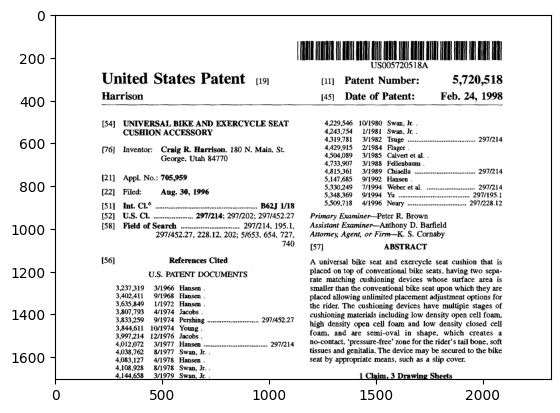

[' 5,720,518'] [' Feb. 24, 1998'] [' Craig R. Harrison, 180 N. Main, St. 4,429'] [' Craig R. Harrison, 180 N. Main, St. 4,429'] [' Aug. 30, 1996 5,348,369 91994 YU essssesssue wus 297/195.1']


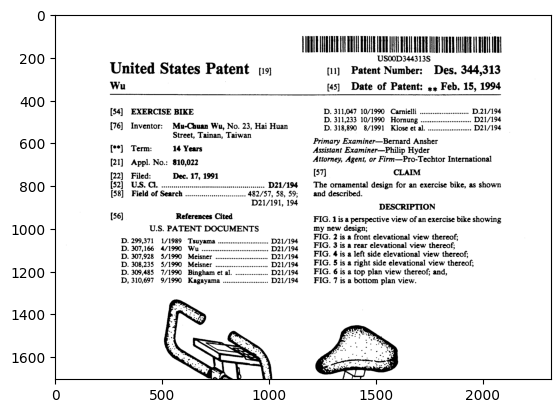

[' Des. 344,313'] [' ,, Feb. 15, 1994'] [' Mu-Chuan Wu, No. 23'] [' Mu-Chuan Wu, No. 23'] [' Dec. 17, 1991']


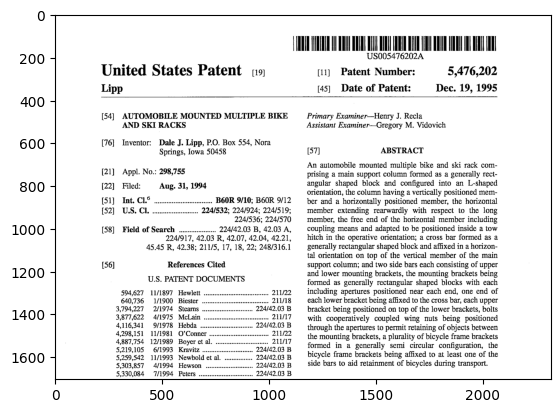

[] [] [' Dale J. Lipp, P.O. Box 554'] [' Dale J. Lipp, P.O. Box 554'] [' Aug. 31, 1994']


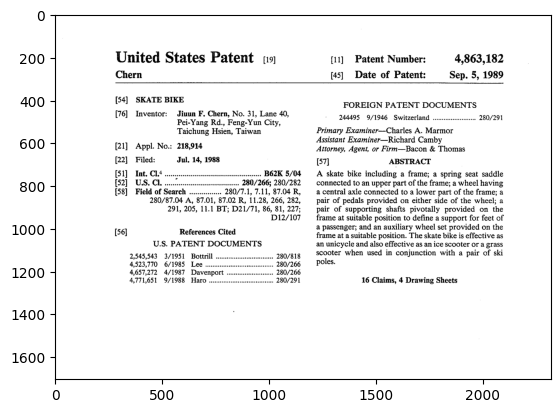

[' 4,863,182'] [' Sep. 5, 1989'] [' Jiuun F, Chern, No. 31, Lane 40'] [' Jiuun F, Chern, No. 31, Lane 40'] [' Jul, 14, 1988']


In [56]:
classe_teste = Extract_Information(caminho_imagem= "Imagem_patentes").main()

classe_teste

### Teste Individual das classes

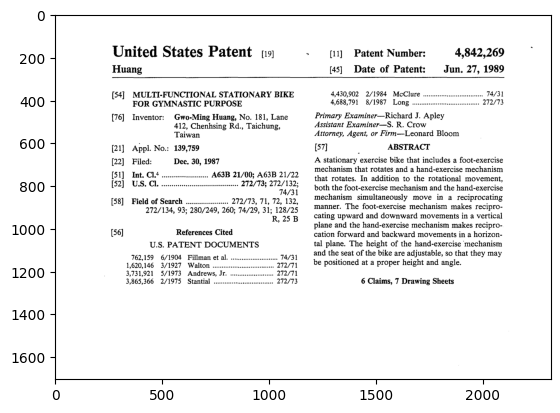

In [27]:
teste = Imagem_patente("Imagem_patentes/document-000-104213.in.000.png")
teste.showImage()

In [28]:
imagem_limpa = Imagem_patente(caminho_image= "Imagem_patentes/document-000-104213.in.000.png").Image()

In [22]:
patent_number, patent_date, patent_title, inventor_name, filed_data = OCR_Image(imagem_limpa).main()

In [23]:
print(patent_number, patent_date, patent_title, inventor_name, filed_data)

[' 4,842,269'] [' Jun. 27, 1989'] [' Gwo-Ming Huang, No. 181'] [' Gwo-Ming Huang, No. 181'] [' Dee. 30, 1987']
